Выполнить визуализацию многомерных данных, используя t-SNE.
Необходимо использовать свой набор многомерных данных (например, можно
использовать MNIST, fashion MNIST). Рассмотреть результаты визуализации
для разных значений перплексии.

In [11]:
import time
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.manifold import TSNE
from umap import UMAP

warnings.filterwarnings('ignore')

data = pd.read_csv('riceClassification.csv', sep=',')

data = data.sample(1000)
D = data.drop(['id', 'Class'], axis=1)
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)
D

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,0.777027,0.811492,0.769914,0.745484,0.778923,0.819949,0.365439,0.751512,0.612164,0.347679
1,0.785191,0.819182,0.777088,0.745689,0.792251,0.826821,0.841006,0.755486,0.616438,0.347911
2,0.431166,0.823250,0.319751,0.938546,0.437620,0.503845,0.192054,0.632760,0.251346,0.719381
3,0.839105,0.854699,0.796291,0.753453,0.828524,0.871634,0.420432,0.771006,0.669244,0.356837
4,0.577140,0.882648,0.470115,0.901334,0.578318,0.643811,0.153255,0.718951,0.339135,0.610304
...,...,...,...,...,...,...,...,...,...,...
995,0.491976,0.729229,0.473255,0.850896,0.488871,0.563488,0.493364,0.588015,0.478325,0.500362
996,0.423423,0.722690,0.384476,0.886568,0.425804,0.496103,0.742547,0.568702,0.380960,0.574440
997,0.393440,0.577623,0.444531,0.799546,0.385958,0.465784,0.384390,0.440663,0.656197,0.416445
998,0.459741,0.871833,0.313950,0.951281,0.458093,0.532125,0.086573,0.653666,0.262199,0.764745


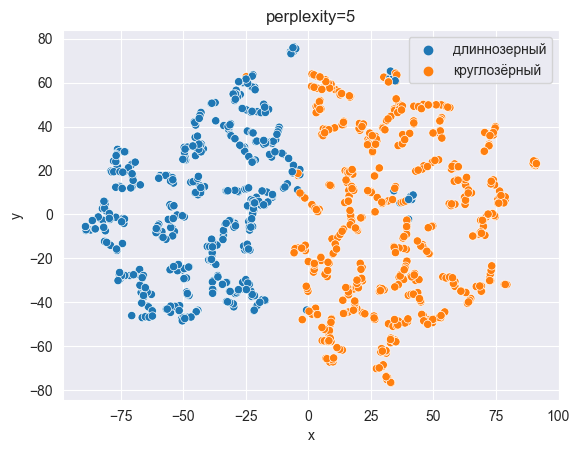

perplexity = 5 time = 0.609375


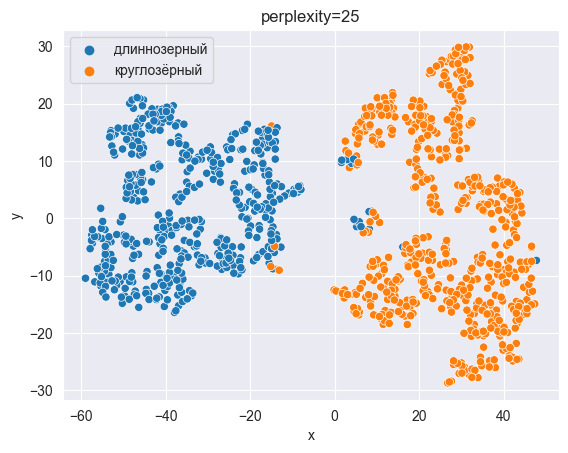

perplexity = 25 time = 1.171875


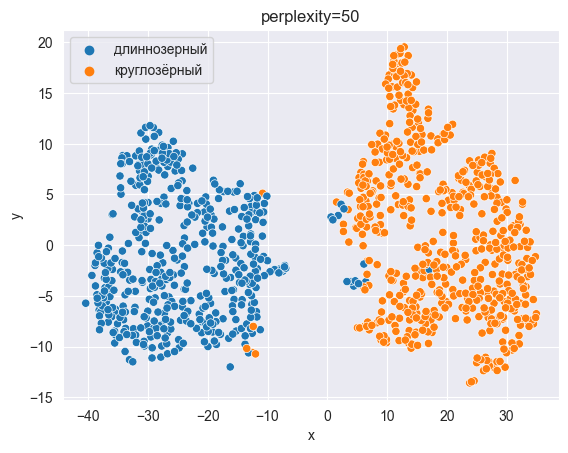

perplexity = 50 time = 1.1875


In [12]:
perplexity = [5, 25, 50]


def show(DATA, perplexity):
    T = TSNE(n_components=2, perplexity=perplexity, random_state=123)
    TSNE_features = T.fit_transform(DATA)
    t_data = DATA.copy()
    t_data['x'] = TSNE_features[:, 0]
    t_data['y'] = TSNE_features[:, 1]
    fig = plt.figure()
    plt.title(f'perplexity={perplexity}')
    sns.scatterplot(x='x', y='y', data=t_data,
                    hue=['круглозёрный' if i == 1 else 'длиннозерный' for i in data['Class']])
    plt.show()


for i in perplexity:
    start = time.process_time()
    show(D, i)
    end = time.process_time()
    print(f'perplexity = {i} time = {end - start}')


Выполнить визуализацию многомерных данных, используя UMAP с
различными параметрами n_neighbors и min_dist. Рассчитать время работы
алгоритма с помощью библиотеки time и сравнить его с временем работы tSNE.

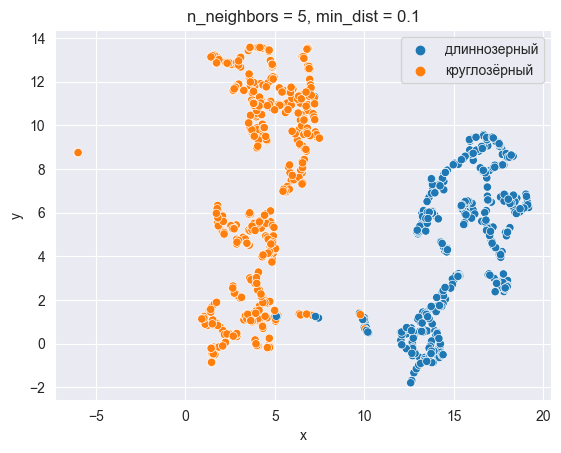

n_neighbors = 5, min_dist = 0.1 time = 1.34375


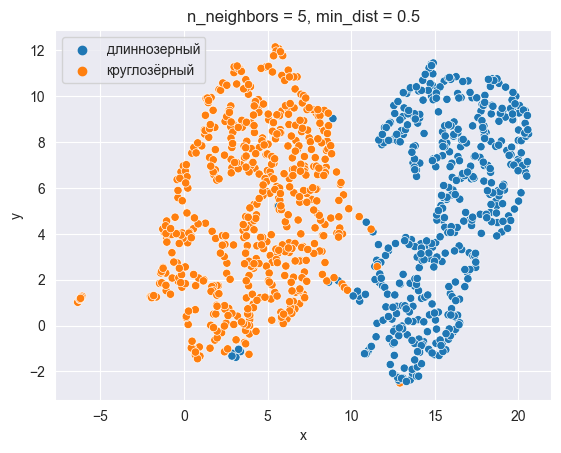

n_neighbors = 5, min_dist = 0.5 time = 1.46875


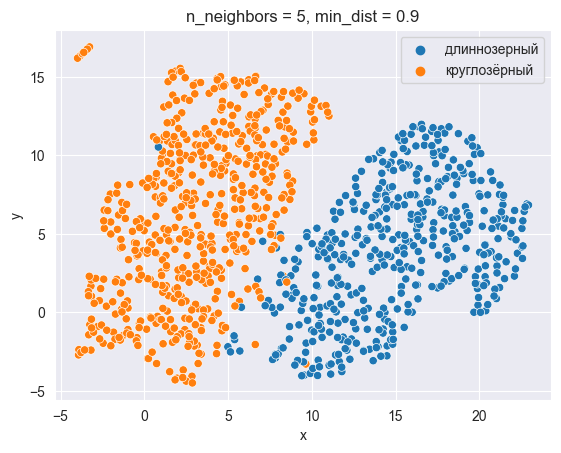

n_neighbors = 5, min_dist = 0.9 time = 1.625


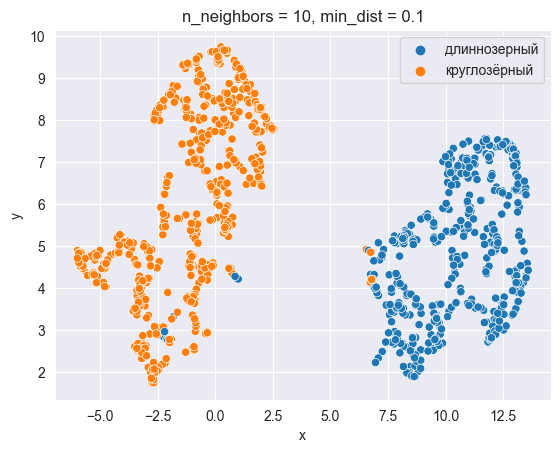

n_neighbors = 10, min_dist = 0.1 time = 1.625


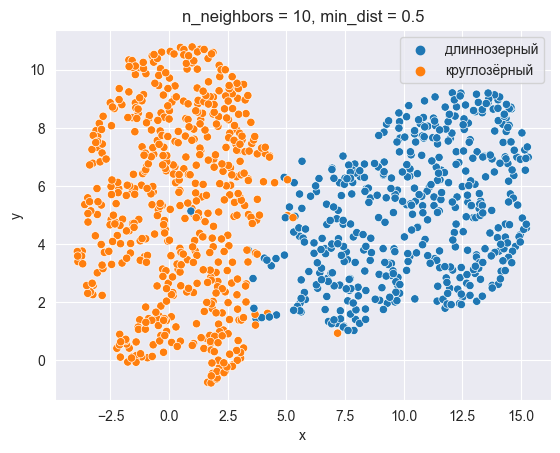

n_neighbors = 10, min_dist = 0.5 time = 1.828125


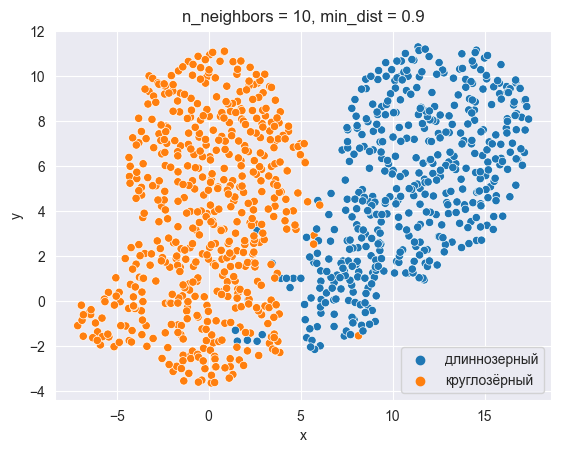

n_neighbors = 10, min_dist = 0.9 time = 1.71875


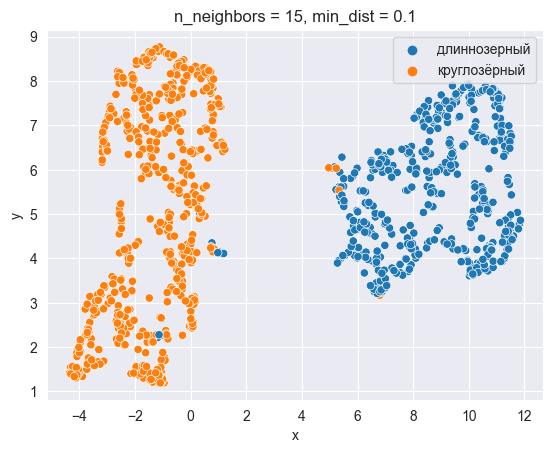

n_neighbors = 15, min_dist = 0.1 time = 2.03125


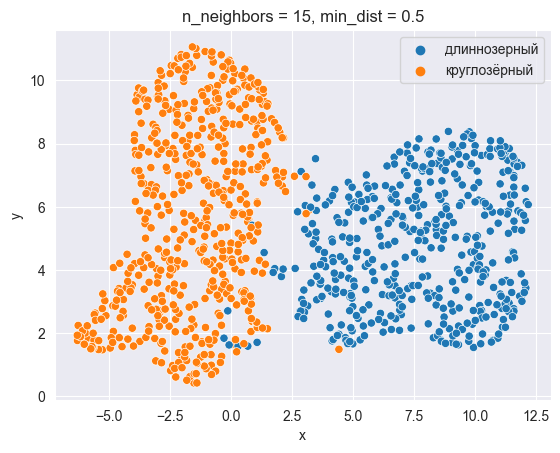

n_neighbors = 15, min_dist = 0.5 time = 2.0


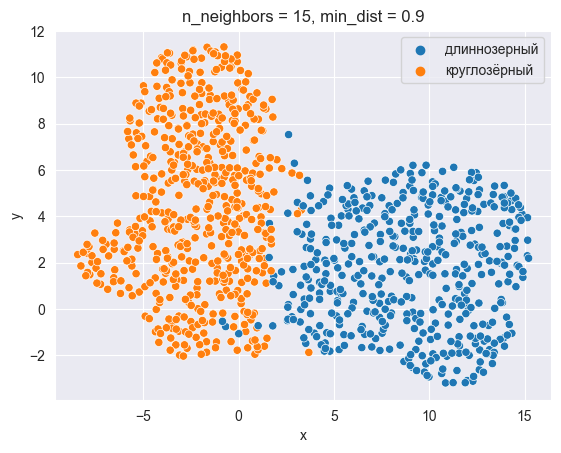

n_neighbors = 15, min_dist = 0.9 time = 1.8125


In [13]:
def show(DATA, n_neighbors, min_dist):
    u_data = DATA.copy()
    UM = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=123).fit_transform(u_data)
    u_data['x'] = UM[:, 0]
    u_data['y'] = UM[:, 1]
    fig = plt.figure()
    plt.title(f'n_neighbors = {n_neighbors}, min_dist = {min_dist}')
    sns.scatterplot(x='x', y='y', data=u_data,
                    hue=['круглозёрный' if i == 1 else 'длиннозерный' for i in data['Class']])
    plt.show()


n_neighbors = [5, 10, 15]
min_dist = [0.1, 0.5, 0.9]

for i in n_neighbors:
    for j in min_dist:
        start = time.process_time()
        show(D, i, j)
        end = time.process_time()
        print(f'n_neighbors = {i}, min_dist = {j} time = {end - start}')